In [1]:
### Spaceship Titanic

<p>
<img src="https://storage.googleapis.com/kaggle-media/competitions/Spaceship%20Titanic/joel-filipe-QwoNAhbmLLo-unsplash.jpg" style="width:100%; height:250px">
</p>

# Analyse du jeux de données

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df1 = pd.read_csv('data/test.csv')
df1.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [3]:
df2=pd.read_csv('data/sample_submission.csv')
df2.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [3]:
df = pd.read_csv('data/train.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df.shape

(8693, 14)

### objectife  

####  Pour aider les équipages de secours et récupérer les passagers perdus, vous êtes mis au défi de prédire quels passagers ont été transportés par l'anomalie en utilisant les enregistrements récupérés à partir du système informatique endommagé du vaisseau spatial.

#### Aidez-les à se sauver et à changer l’histoire !


### Checklist de base
#### Analyse de Forme :
- **variable target** : Transported
- **lignes et colonnes** : 8693, 14
- **types de variables** : qualitatives : 7, quantitatives : 6, bool:1 = la variable target 
- **Analyse des valeurs manquantes** :
    - pas beaucoup de NaN ( >04% <05% )    

#### Analyse de Fond :
- **Visualisation de la target** :
    - (50.3%/49.6%)(T/F)(4378 / 4315)

    
    
- **Signification des variables** :

     - **Variable qualitative** : RoomService,	FoodCourt,	ShoppingMall,	Spa	VRDeck Age
     - **Variable quantitative** : HomePlanet ,Cabin	,Destination		
     - **boolean** : CryoSleep , VIP

- **Relation Variables / Target** :
     - IsAlone on remarque que quand qlq un est seul forte" chance quil ne soit pas tranposrter  isalon=transported fals la majorrite 
     
    


#### Analyse de forme 

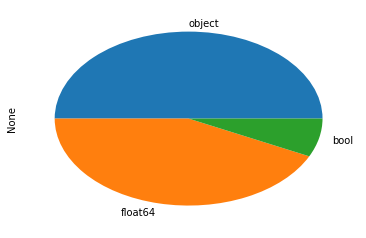

In [5]:
df.dtypes.value_counts().plot.pie()

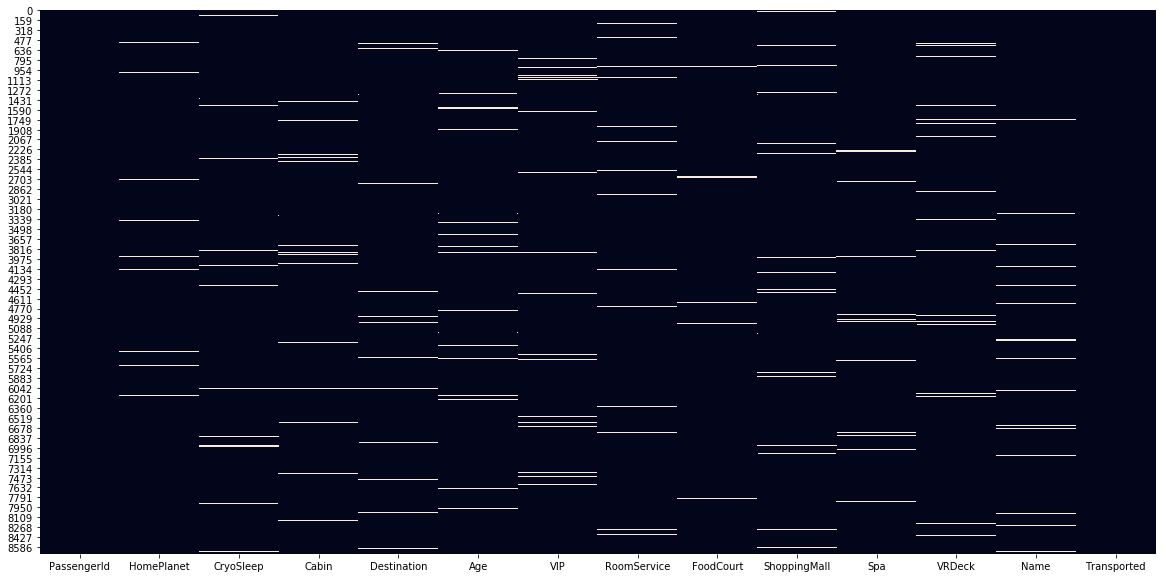

In [6]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)  #affichier le data set au compler pour bien voire

In [7]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

PassengerId     0.000000
Transported     0.000000
Age             0.020591
RoomService     0.020821
Destination     0.020936
FoodCourt       0.021051
Spa             0.021051
VRDeck          0.021627
Cabin           0.022892
Name            0.023007
HomePlanet      0.023122
VIP             0.023352
ShoppingMall    0.023927
CryoSleep       0.024963
dtype: float64

In [8]:
# df = df1[df1.columns[df1.isna().sum()/df.shape[0] < 0.90]]

In [9]:
df.columns

Index([u'PassengerId', u'HomePlanet', u'CryoSleep', u'Cabin', u'Destination',
       u'Age', u'VIP', u'RoomService', u'FoodCourt', u'ShoppingMall', u'Spa',
       u'VRDeck', u'Name', u'Transported'],
      dtype='object')

In [10]:
# df = df1.drop(['PassengerId'],axis=1)

### Analyse de fond

#### Visualisation de la target

In [11]:
df['Transported'].value_counts(normalize=True)

True     0.503624
False    0.496376
Name: Transported, dtype: float64

#### Histogrames des variables continues

C:\Users\user.user-PC\Anaconda2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


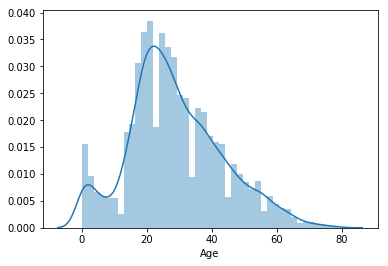

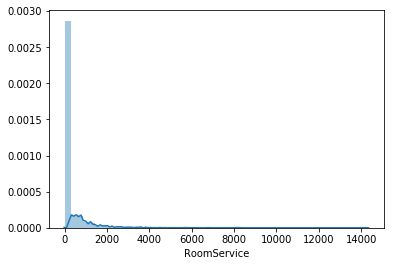

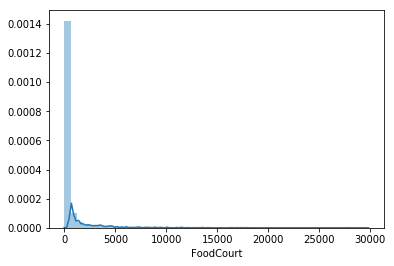

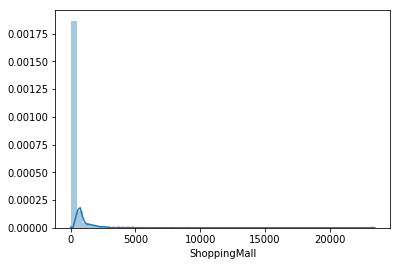

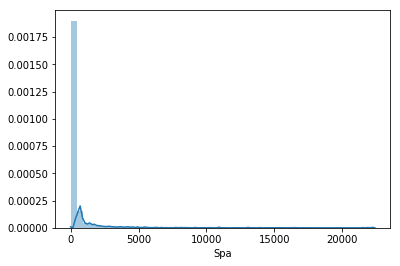

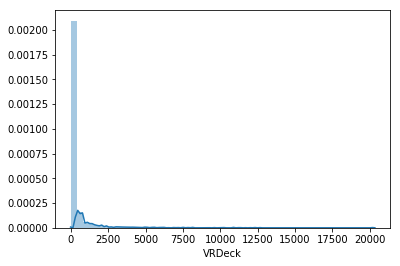

In [12]:
df_hist =df.copy()
for col in df_hist.select_dtypes('float'):
    df_hist.dropna(subset=[col], inplace=True)
    df_hist[col].fillna(0, inplace=True)
    plt.figure()
    sns.distplot(df_hist[col])

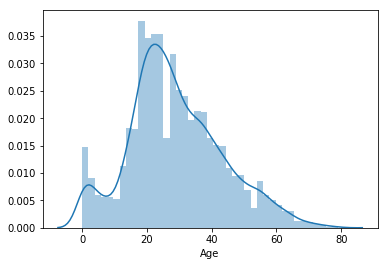

In [13]:
sns.distplot(df_hist['Age'])

#### Variables Qualitatives

In [14]:
for col in df.select_dtypes('object'):
    print('{col:-<50} {values}'.format(col=col, values=df[col].unique()))

PassengerId--------------------------------------- ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']
HomePlanet---------------------------------------- ['Europa' 'Earth' 'Mars' nan]
CryoSleep----------------------------------------- [False True nan]
Cabin--------------------------------------------- ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
Destination--------------------------------------- ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
VIP----------------------------------------------- [False True nan]
Name---------------------------------------------- ['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey Connon'
 'Celeon Hontichre' 'Propsh Hontichre']


In [55]:
df_obj=df.select_dtypes('object')
df_obj=df_obj[['HomePlanet','CryoSleep','Destination','VIP']]

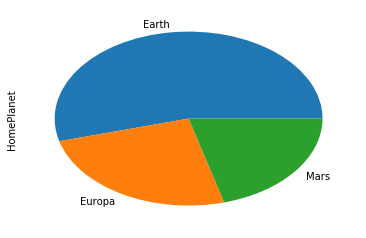

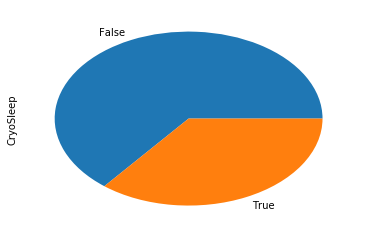

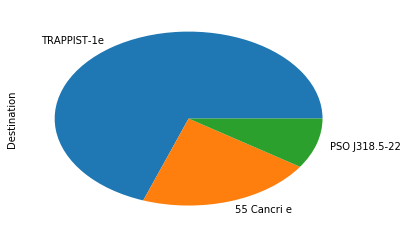

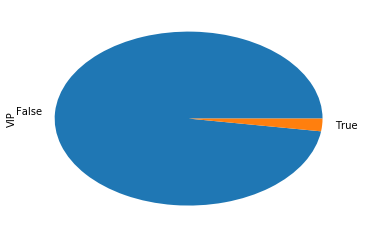

In [56]:
for col in df_obj:
    plt.figure()
    df[col].value_counts().plot.pie()

#### Relation Target / Variables

#### création des groupe  de familles 

In [17]:
# Extraire le groupe à partir de PassengerId
df['Group'] = df['PassengerId'].apply(lambda x: x.split('_')[0])

# Calculer la taille du groupe pour chaque passager
df['GroupSize'] = df.groupby('Group')['PassengerId'].transform('count')


In [18]:
# Créer une colonne indiquant si le passager est seul ou non
df['IsAlone'] = (df['GroupSize'] == 1).astype(int)


In [19]:
# Extraire le numéro pp du passager
df['GroupOrder'] = df['PassengerId'].apply(lambda x: int(x.split('_')[1]))


In [20]:
df['IsAlone'].value_counts(normalize=True)

1    0.552744
0    0.447256
Name: IsAlone, dtype: float64

#### Comparaison 
#### Target/IsAlone 

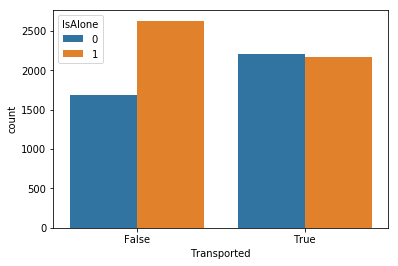

In [21]:
sns.countplot(x='Transported',hue='IsAlone',data=df)

In [22]:
pd.crosstab(df['Transported'], df['IsAlone'])

IsAlone,0,1
Transported,,
False,1684,2631
True,2204,2174


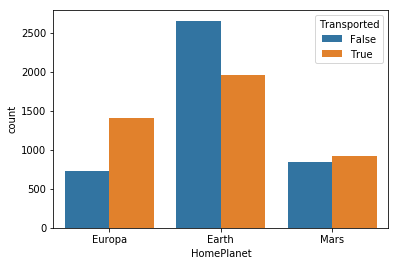

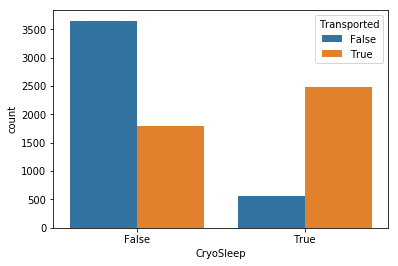

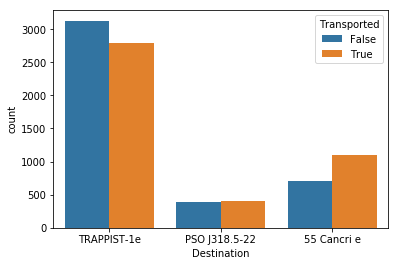

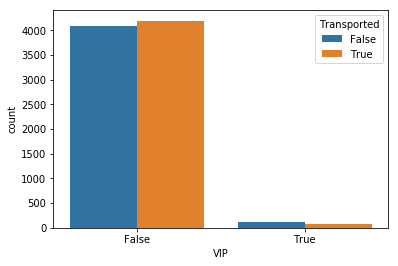

In [57]:
for col in df_obj:
    plt.figure()
    sns.countplot(x=col,hue='Transported',data=df)

In [23]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,GroupSize,IsAlone,GroupOrder
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,1,1,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,1,1,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,2,0,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,2,0,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,1,1,1
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True,0005,1,1,1
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True,0006,2,0,1
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True,0006,2,0,2
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True,0007,1,1,1
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True,0008,3,0,1


In [24]:
col_cible=df[['IsAlone','HomePlanet','CryoSleep','Destination','VIP']]

In [25]:
df['Destination'].value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [26]:
col_cible.head()

,IsAlone,HomePlanet,CryoSleep,Destination,VIP
0,1,Europa,False,TRAPPIST-1e,False
1,1,Earth,False,TRAPPIST-1e,False
2,0,Europa,False,TRAPPIST-1e,True
3,0,Europa,False,TRAPPIST-1e,False
4,1,Earth,False,TRAPPIST-1e,False


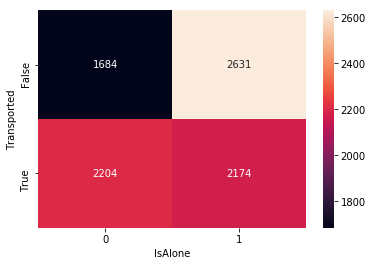

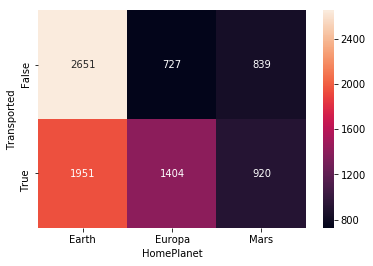

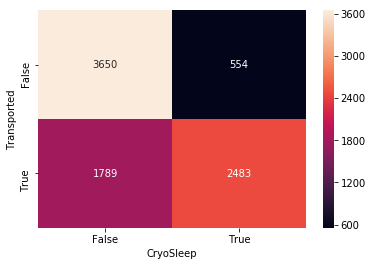

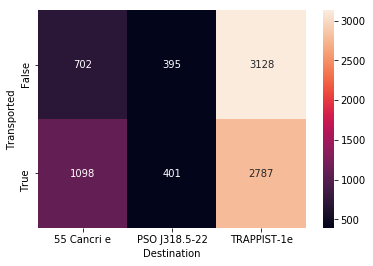

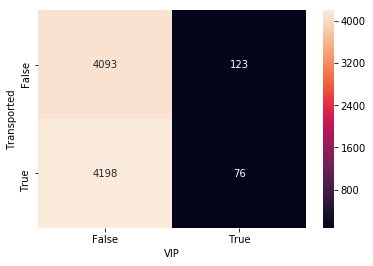

In [27]:
for col in col_cible:
    plt.figure()
    sns.heatmap(pd.crosstab(df['Transported'], df[col]), annot=True, fmt='d')

#### Analyse un peu plus Avancée
##### Relation Variables / Variables

In [28]:
col_buy=df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]

In [29]:
col_buy=col_buy.columns

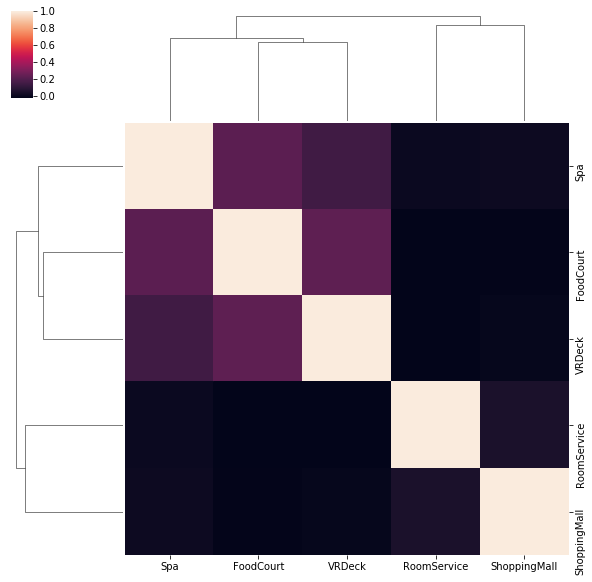

In [30]:
sns.clustermap(df[col_buy].corr())

<Figure size 432x288 with 0 Axes>

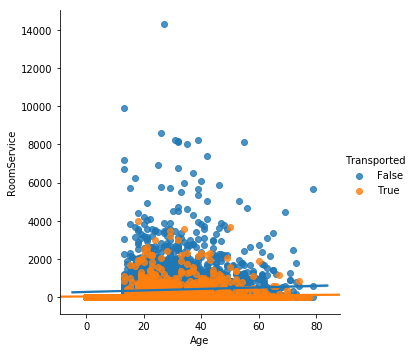

<Figure size 432x288 with 0 Axes>

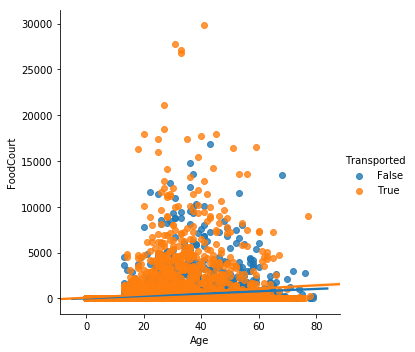

<Figure size 432x288 with 0 Axes>

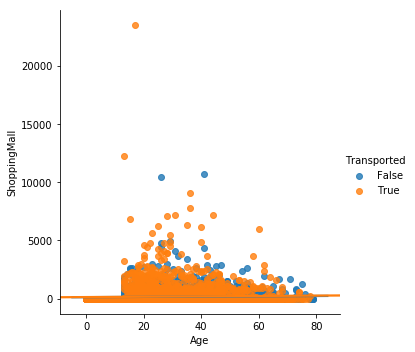

<Figure size 432x288 with 0 Axes>

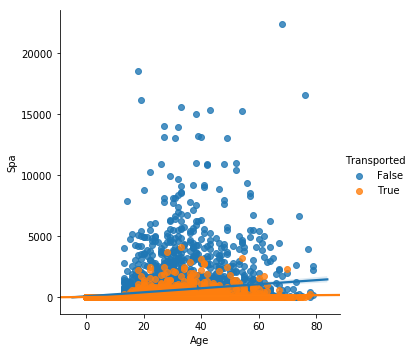

<Figure size 432x288 with 0 Axes>

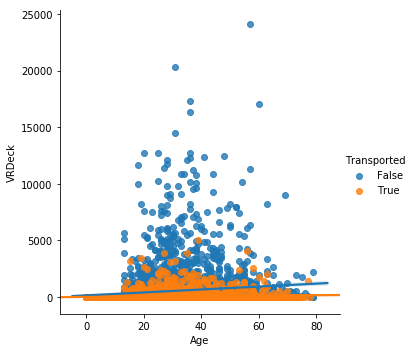

In [36]:
for col in col_buy:
    plt.figure()
    sns.lmplot(x='Age', y=col, hue='Transported', data=df)

In [32]:
df['somme']=df[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1)

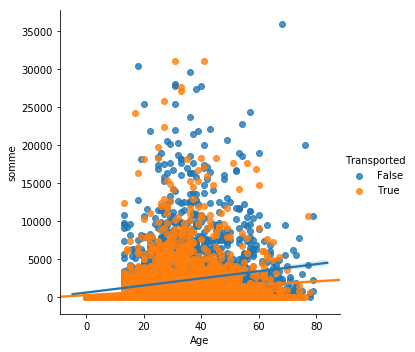

In [33]:
sns.lmplot(x='Age',y='somme',hue='Transported',data=df)

In [34]:
df.corr()['Age'].sort_values()

GroupSize      -0.179102
GroupOrder     -0.132756
Transported    -0.075026
ShoppingMall    0.033133
RoomService     0.068723
VRDeck          0.101007
Spa             0.123970
FoodCourt       0.130421
IsAlone         0.135174
somme           0.186530
Age             1.000000
Name: Age, dtype: float64

#### Création de sous-ensembles vrai et faux 

In [44]:
Transported_true = df[df['Transported']==True]
Transported_false =df[df['Transported']==False]

In [45]:
Transported_true

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,GroupSize,IsAlone,GroupOrder,somme
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,1,1,1,736.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,1,1,1,1091.0
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True,0005,1,1,1,774.0
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True,0006,2,0,1,1584.0
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True,0006,2,0,2,0.0
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True,0007,1,1,1,1018.0
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True,0008,3,0,1,0.0
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True,0008,3,0,2,0.0
11,0008_03,Europa,False,B/1/P,55 Cancri e,45.0,False,39.0,7295.0,589.0,110.0,124.0,Wezena Flatic,True,0008,3,0,3,8157.0
12,0009_01,Mars,False,F/1/P,TRAPPIST-1e,32.0,False,73.0,0.0,1123.0,0.0,113.0,Berers Barne,True,0009,1,1,1,1309.0


In [46]:
Transported_true['IsAlone'].value_counts()

0    2204
1    2174
Name: IsAlone, dtype: int64

In [47]:
Transported_false['IsAlone'].value_counts()

1    2631
0    1684
Name: IsAlone, dtype: int64